## Ejemplo Práctico de K-NN

Ejemplo Práctico de Escalamiento

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Datos originales
X = np.array([[180, 75], [165, 65], [170, 70], [160, 60]])


# Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

# Estandarización
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)


print("Datos originales:\n", X)
print("\nDatos normalizados (Min-Max):\n", X_minmax)
print("\nDatos estandarizados (Z-Score):\n", X_std)

In [ ]:
import numpy as np
# Definimos los puntos
A = np.array([180, 75])
B = np.array([170, 70])
# Calculamos la distancia euclideana
distancia = np.sqrt(np.sum((A - B)**2))
print(f"La distancia euclideana entre A y B es: {distancia}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Datos de ejemplo
X = np.array([[180, 75], [165, 65], [170, 70], [160, 60],  [175, 72], [162, 63], [178, 74], [168, 68]])
y = np.array(['Fútbol', 'Baloncesto', 'Fútbol', 'Baloncesto', 'Fútbol', 'Baloncesto', 'Fútbol', 'Baloncesto'])

# Dividir datos y escalar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Probar diferentes valores de K
k_values = range(1, 6)
accuracies = []

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  accuracies.append(accuracy_score(y_test, y_pred))

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Exactitud vs. Valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Exactitud')
plt.grid(True)
plt.show()

## Live Coding

**0) Setup**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report


**1) Dataset simple y limpio**

In [ ]:
#!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

El Breast Cancer Wisconsin (Original) es un dataset clásico de clasificación médica desarrollado en la Universidad de Wisconsin. Contiene resultados de biopsias por aspiración con aguja fina (FNA), donde un patólogo evaluó características de células extraídas de tumores mamarios.

Cada registro representa una muestra celular y describe propiedades morfológicas observadas al microscopio, como el grosor del conglomerado celular, la uniformidad en tamaño y forma, la presencia de mitosis y la apariencia del núcleo. Estas características fueron codificadas en una escala numérica (generalmente de 1 a 10).

El objetivo del dataset es clasificar cada muestra como:
* Benigna (no cancerosa)
* Maligna (cancerosa)

In [ ]:
# 1) Cargar dataset UCI (Original)
data = fetch_ucirepo(id=15)

Características (X)

In [ ]:
display(data.data.features.head())

| Variable                        | Qué representa                              | Intuición clínica                                               |
| ------------------------------- | ------------------------------------------- | --------------------------------------------------------------- |
| **Clump_thickness**             | Espesor del conglomerado celular            | Tumores malignos tienden a formar masas más gruesas y compactas |
| **Uniformity_of_cell_size**     | Uniformidad en el tamaño de las células     | En tumores malignos las células varían mucho en tamaño          |
| **Uniformity_of_cell_shape**    | Uniformidad en la forma de las células      | Las células cancerosas suelen tener formas irregulares          |
| **Marginal_adhesion**           | Adhesión entre células en los bordes        | En cáncer, las células pierden adhesión normal                  |
| **Single_epithelial_cell_size** | Tamaño de células epiteliales individuales  | Aumento anormal puede indicar malignidad                        |
| **Bare_nuclei**                 | Núcleos “desnudos” (sin citoplasma visible) | Indicador fuerte de células anormales                           |
| **Bland_chromatin**             | Apariencia de la cromatina nuclear          | Cromatina irregular o granular es típica en malignidad          |
| **Normal_nucleoli**             | Presencia y tamaño de nucleolos             | Nucleolos prominentes son comunes en células cancerosas         |
| **Mitoses**                     | Cantidad de divisiones celulares observadas | Alta tasa mitótica → crecimiento agresivo                       |


Variables Objetivo (y)

In [ ]:
display(data.data.targets.head())

**Separar X e y**

In [ ]:
X = data.data.features.copy()
y = data.data.targets.copy()

In [ ]:
y.value_counts()

* 2 → (Benigno)
* 4 → (Maligno)

**Separa en grupo de entrenamiento y testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
    # ¿Por qué se usa stratify=y? El dataset no tiene exactamente la misma cantidad de casos en cada clase (458 vs 241)
    # Divide, pero mantén en train y test la misma proporción de clases que hay en el dataset completo
)

**2) Aplicación de StandardScaler y MinMaxScaler.**

**3) Implementación de KNeighborsClassifier.**

In [ ]:
k_inicial = 5

# Pipeline con StandardScaler
pipe_std = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=k_inicial))
])

# Pipeline con MinMaxScaler
pipe_mm = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=k_inicial))
])

In [ ]:
# .values.ravel() toma un DataFrame o una Serie de pandas,
# lo convierte en un array de NumPy y luego lo "aplana" a una única dimensión
pipe_std.fit(X_train, y_train.values.ravel())
y_pred_std = pipe_std.predict(X_test)

pipe_mm.fit(X_train, y_train.values.ravel())
y_pred_mm = pipe_mm.predict(X_test)

In [ ]:
print("=== KNN + StandardScaler ===")
print("Accuracy:", accuracy_score(y_test, y_pred_std))
print("Matriz confusión:\n", confusion_matrix(y_test, y_pred_std))
print(classification_report(y_test, y_pred_std))

In [ ]:
print("\n=== KNN + MinMaxScaler ===")
print("Accuracy:", accuracy_score(y_test, y_pred_mm))
print("Matriz confusión:\n", confusion_matrix(y_test, y_pred_mm))
print(classification_report(y_test, y_pred_mm))

**4) Evaluación de precisión para diferentes valores de K.**

**5) Visualización de exactitud con Matplotlib.**

* Accuracy vs K usando Pipeline (StandardScaler)

In [ ]:
k_values = range(1, 31)
scores = []

for k in k_values:
    pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    pipe.fit(X_train, y_train.values.ravel())
    y_pred = pipe.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

best_k = k_values[int(np.argmax(scores))]
print("Mejor K:", best_k)
print("Mejor Accuracy:", max(scores))

plt.plot(list(k_values), scores)
plt.xlabel("K")
plt.ylabel("Accuracy (test)")
plt.title('Exactitud vs. Valor de K')
plt.grid(True)
plt.show()

* Comparar StandardScaler vs MinMaxScaler

In [ ]:
k_values = range(1, 31)

scores_std = []
scores_mm = []

for k in k_values:
    pipe_std = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    pipe_std.fit(X_train, y_train.values.ravel())
    scores_std.append(accuracy_score(y_test, pipe_std.predict(X_test)))

    pipe_mm = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", MinMaxScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    pipe_mm.fit(X_train, y_train.values.ravel())
    scores_mm.append(accuracy_score(y_test, pipe_mm.predict(X_test)))

print("Mejor K (Standard):", k_values[int(np.argmax(scores_std))], "Acc:", max(scores_std))
print("Mejor K (MinMax)  :", k_values[int(np.argmax(scores_mm))], "Acc:", max(scores_mm))

plt.plot(list(k_values), scores_std, label="StandardScaler")
plt.plot(list(k_values), scores_mm, label="MinMaxScaler")
plt.xlabel("K")
plt.ylabel("Accuracy (test)")
plt.legend()
plt.show()

**6) Uso de matriz de confusión y F1-score.**

**Métricas de Evaluación**

**Precision**

Proporción de predicciones positivas que fueron correctas.
Indica qué tan confiables son las predicciones positivas del modelo.

$$
Precision = \frac{TP}{TP + FP}
$$


**Recall (Sensibilidad)**

Proporción de casos positivos reales que el modelo logró identificar correctamente.
Mide la capacidad del modelo para detectar la clase positiva.

$$
Recall = \frac{TP}{TP + FN}
$$
	​
**F1-Score**

Media armónica entre Precision y Recall.
Se utiliza cuando se busca un balance entre ambas métricas.

$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$

**Support**

Cantidad de observaciones reales que pertenecen a cada clase en el conjunto de evaluación.
No mide rendimiento, solo indica el número de casos por clase.

**Accuracy**
Proporción total de predicciones correctas respecto al total de observaciones.

$$
Accuracy = \frac{TP + TN}{Total}
$$

Indica qué porcentaje global de casos fueron correctamente clasificados.


**Macro Average**
Promedio simple de la métrica (Precision, Recall o F1) calculada para cada clase.

$$
Macro\ F1 = \frac{F1_{clase\ 2} + F1_{clase\ 4}}{2}
$$

No considera el tamaño de cada clase.  
Cada clase aporta el mismo peso al promedio.

**Weighted Average**
Promedio ponderado según la cantidad de observaciones (support) de cada clase.

$$
Weighted\ F1 =
\frac{F1_{clase\ 2} \cdot n_2 + F1_{clase\ 4} \cdot n_4}
{n_2 + n_4}
$$

Las clases con más observaciones influyen más en el resultado final.

In [ ]:
best_k_std = k_values[int(np.argmax(scores_std))]
best_k_mm  = k_values[int(np.argmax(scores_mm))]

print("Mejor K (Standard):", best_k_std)
print("Mejor K (MinMax):", best_k_mm)

* StandardScaler

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pipe_std_best = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=best_k_std))
])

pipe_std_best.fit(X_train, y_train.values.ravel())
y_pred_std_best = pipe_std_best.predict(X_test)

print("=== StandardScaler ===")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_std_best))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_std_best))

- **Clase 2 (Benigno)**  
  - Precision: 0.98  
  - Recall: 0.97  
  - F1-score: 0.97  

  El modelo identifica correctamente la gran mayoría de los casos benignos y cuando predice "benigno" casi siempre acierta.

- **Clase 4 (Maligno)**  
  - Precision: 0.94  
  - Recall: 0.96  
  - F1-score: 0.95  

  El modelo detecta el 96% de los tumores malignos, lo cual es especialmente relevante en un contexto médico.  
  La tasa de falsos negativos es baja, lo que reduce el riesgo de clasificar erróneamente un caso maligno como benigno.


* MinMaxScaler

In [ ]:
pipe_mm_best = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=best_k_mm))
])

pipe_mm_best.fit(X_train, y_train.values.ravel())
y_pred_mm_best = pipe_mm_best.predict(X_test)

print("=== MinMaxScaler ===")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_mm_best))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_mm_best))

- **Clase 2 (Benigno)**  
  - Precision: 0.97  
  - Recall: 0.97  
  - F1-score: 0.97  

  El modelo clasifica correctamente la gran mayoría de los casos benignos, mostrando estabilidad y consistencia en esta clase.

- **Clase 4 (Maligno)**  
  - Precision: 0.94  
  - Recall: 0.94  
  - F1-score: 0.94  

  El modelo detecta el 94% de los tumores malignos.  
  Aunque el desempeño sigue siendo alto, el recall disminuye ligeramente respecto al modelo anterior, lo que implica un leve aumento en falsos negativos.


* **Gráfica de la Matriz de confusión**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Matrices
cm_std = confusion_matrix(y_test, y_pred_std_best)
cm_mm  = confusion_matrix(y_test, y_pred_mm_best)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_std, annot=True, fmt='d', cmap='Blues',
            xticklabels=[2,4], yticklabels=[2,4], ax=axes[0])
axes[0].set_title("StandardScaler")
axes[0].set_xlabel("Predicho")
axes[0].set_ylabel("Real")

sns.heatmap(cm_mm, annot=True, fmt='d', cmap='Greens',
            xticklabels=[2,4], yticklabels=[2,4], ax=axes[1])
axes[1].set_title("MinMaxScaler")
axes[1].set_xlabel("Predicho")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

La Matriz de Confusión permite visualizar el rendimiento del modelo mostrando la cantidad de predicciones correctas e incorrectas, clasificadas según la clase real y la clase predicha.

StandardScaler:
* Detecta 46 de 48 malignos
* Falla 2

MinMaxScaler:
* Detecta 45 de 48 malignos
* Falla 3

Una diferencia de 1 paciente.

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

report_std = classification_report(y_test, y_pred_std_best, output_dict=True)
report_mm  = classification_report(y_test, y_pred_mm_best, output_dict=True)

summary = pd.DataFrame({
    "StandardScaler": {
        "Accuracy": report_std["accuracy"],
        "F1 clase 4 (Maligno)": report_std["4"]["f1-score"],
        "Recall clase 4": report_std["4"]["recall"],
        "Precision clase 4": report_std["4"]["precision"]
    },
    "MinMaxScaler": {
        "Accuracy": report_mm["accuracy"],
        "F1 clase 4 (Maligno)": report_mm["4"]["f1-score"],
        "Recall clase 4": report_mm["4"]["recall"],
        "Precision clase 4": report_mm["4"]["precision"]
    }
})

summary

**7) Elección del modelo final.**


La elección no debe basarse solo en accuracy.

En este problema:
* Clase 4 = maligno.
* El costo de no detectar un maligno (falso negativo) es alto.

Entonces el criterio correcto no es:¿Cuál tiene más accuracy?

Sino: ¿Cuál detecta mejor los malignos?

Ahí gana claramente StandardScaler, porque:
* Mayor recall clase 4 (0.958 vs 0.937)
* Mejor F1 clase 4
* Accuracy también ligeramente superior

Dado que el objetivo es maximizar la detección de tumores malignos, se selecciona el modelo con StandardScaler, ya que presenta mayor recall en la clase crítica y mejor F1-score, manteniendo además la mayor accuracy global.

**8) Predicción con datos nuevos.**

In [ ]:
import pandas as pd

nuevo = {
    "Clump_thickness": 5,
    "Uniformity_of_cell_size": 1,
    "Uniformity_of_cell_shape": 1,
    "Marginal_adhesion": 1,
    "Single_epithelial_cell_size": 2,
    "Bare_nuclei": 1,
    "Bland_chromatin": 3,
    "Normal_nucleoli": 1,
    "Mitoses": 1
}

X_new = pd.DataFrame([nuevo])

pred = pipe_std_best.predict(X_new)[0]
proba = pipe_std_best.predict_proba(X_new)[0]

print("Predicción (clase):", pred)
print("Probabilidades por clase:", dict(zip(pipe_std_best.named_steps["knn"].classes_, proba)))

if pred == 2:
    print("Interpretación: Benigno (2)")
else:
    print("Interpretación: Maligno (4)")

## Ejercicio 1

**0) Setup**

El bank-full.csv es el Bank Marketing Dataset de UCI.
Corresponde a campañas telefónicas de un banco portugués para ofrecer un depósito a plazo fijo.

Cada fila representa un cliente contactado en una campaña.

El objetivo es predecir si el cliente suscribirá (y = yes) o no (y = no) el producto.

**1) Cargar dataset**

In [ ]:
import pandas as pd

df = pd.read_csv("bank-full.csv", sep=";")
df.head()

| Campo     | Qué significa                    |
| --------- | -------------------------------- |
| age       | Edad del cliente                 |
| job       | Tipo de ocupación                |
| marital   | Estado civil                     |
| education | Nivel educativo                  |
| default   | Tiene crédito en default (sí/no) |
| balance | Saldo promedio anual en euros     |
| housing | Tiene crédito hipotecario (sí/no) |
| loan    | Tiene crédito personal (sí/no)    |
| contact  | Tipo de contacto (celular / fijo)                                   |
| day      | Día del último contacto del mes                                     |
| month    | Mes del contacto                                                    |
| duration | Duración de la última llamada (segundos)                            |
| campaign | Número de contactos realizados en esta campaña                      |
| pdays    | Días desde el último contacto previo (-1 = no fue contactado antes) |
| previous | Número de contactos previos antes de esta campaña                   |
| poutcome | Resultado de campaña previa (success, failure, unknown)             |



**2) Exploración inicial**

In [ ]:
# Dimensiones
df.shape

In [ ]:
# Tipos de datos
df.info()

In [ ]:
# Distribución variable objetivo
df["y"].value_counts(normalize=True)

In [ ]:
# Resumen numéricas
df.describe()

**3) Aplicar escalamiento a las variables numéricas.**

**4) Convertir variables categóricas en variables numéricas (One Hot Encoding).**

Primero separamos

In [ ]:
X = df.drop("y", axis=1)
y = df["y"]

Identificamos columnas

In [ ]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

num_cols, cat_cols

Pipeline de preprocesamiento

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

**5) Dividir en conjunto de entrenamiento y prueba.**

In [ ]:
display(y.value_counts())

El dataset bancario está desbalanceado.
Hay muchos más clientes que dicen “no” que “yes”.

=> stratify=y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

**6) Entrenar un modelo K-NN con varios valores de K**

**7) Calcular accuracy, matriz de confusión y F1-score para cada valor.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
import pandas as pd

k_values = range(1, 31)
metrics = []
matrices_confusion = {}

for k in k_values:

    model = Pipeline(steps=[
        ("preprocess", preprocess),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label="yes")
    cm = confusion_matrix(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label="yes")

    metrics.append({
        "k": k,
        "accuracy": acc,
        "f1": f1,
        "recall_yes": recall
    })

    matrices_confusion[k] = cm

results = pd.DataFrame(metrics)
results.head()

In [ ]:
#for k in k_values:
#    print(f"\nK = {k}")
#    print("Accuracy:", results.loc[results["k"] == k, "accuracy"].values[0])
#    print("F1-score:", results.loc[results["k"] == k, "f1"].values[0])
#    print("Matriz de Confusión:\n", matrices_confusion[k])

F1-score mide el equilibrio entre:
* Qué tan bien detecta los positivos (recall)
* Qué tan confiable es cuando predice positivo (precision)

In [ ]:
results.sort_values("f1", ascending=False).head()

In [ ]:
k_f1 = 1
print(f"\nK = {k_f1}")
print("Accuracy:", results.loc[results["k"] == k_f1, "accuracy"].values[0])
print("F1-score:", results.loc[results["k"] == k_f1, "f1"].values[0])
print("Recall:",   results.loc[results["k"] == k_f1, "recall_yes"].values[0])
print("Matriz de Confusión:\n", matrices_confusion[k_f1])

El accuracy mide qué porcentaje total de predicciones fueron correctas.

In [ ]:
results.sort_values("accuracy", ascending=False).head()

In [ ]:
k_accu = 9
print(f"\nK = {k_accu}")
print("Accuracy:", results.loc[results["k"] == k_accu, "accuracy"].values[0])
print("F1-score:", results.loc[results["k"] == k_accu, "f1"].values[0])
print("Recall:",   results.loc[results["k"] == k_accu, "recall_yes"].values[0])
print("Matriz de Confusión:\n", matrices_confusion[k_accu])

**8) Graficar el impacto de K en el rendimiento del modelo.**

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(results["k"], results["accuracy"], label="Accuracy")
plt.plot(results["k"], results["f1"], label="F1-score")
plt.xlabel("K")
plt.ylabel("Score")
plt.title("Impacto del valor de K")
plt.legend()
plt.show()

* La accuracy (línea azul) se mantiene alta y bastante estable (~0.88 a 0.90).
* El F1-score (línea naranja) es mucho más bajo (~0.34 a 0.46).
* Además, el F1 fluctúa bastante para K pequeños.

Eso confirma: El dataset está desbalanceado.

El modelo clasifica muy bien la clase mayoritaria (“no”), pero le cuesta más detectar correctamente la clase “yes”.

**9) Elegir mejor K y explicar**

Comportamiento según K
* K pequeño (1, 3, 5)
  - F1 es más alto.
  - Hay mayor sensibilidad hacia la clase minoritaria.
  - Pero también hay más ruido (alta varianza).

* K grande (15+)
  - Accuracy se estabiliza levemente más arriba.
  - F1 empieza a bajar.
  - El modelo se vuelve más conservador.
  - Predice más “no”.

Eso es comportamiento típico de KNN:
* K pequeño → modelo flexible (sobreajuste).
* K grande → modelo más suavizado (subajuste hacia clase dominante).

Si analizamos Recall

In [ ]:
results.sort_values("recall_yes", ascending=False).head()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(results["k"], results["recall_yes"], label="Recall (yes)")
plt.plot(results["k"], results["f1"], label="F1-score")
plt.xlabel("K")
plt.ylabel("Score")
plt.title("Recall y F1 según valor de K")
plt.legend()
plt.show()

Ambos bajan en promedio a medida que K aumenta.

Eso confirma algo clave: El modelo tiene dificultades reales para detectar la clase positiva.

K pequeños (1, 3, 5)
 * Recall más alto.
 * Mejor capacidad para detectar clientes que sí aceptarían.
 * Pero más variabilidad (ruido).

K grandes (20+)
  * Recall cae bastante.
  * El modelo se vuelve más conservador.
  * Predice mayoritariamente "no".

A mayor K → más estabilidad

Pero → menor sensibilidad a la clase minoritaria

Cuando K aumenta:

Es más probable que los vecinos cercanos sean mayoría "no".

El modelo termina votando "no".

Y pierde positivos reales.

**Opción A:** Elegir K por objetivo comercial
1) Si quieres captar más “yes” (no perder interesados)
  - Elige el K que maximice Recall(yes) o F1(yes).
  - Suele ser K pequeño (1–9).

    *“Prefiero equivocarme llamando a algunos que no aceptarán, antes que dejar fuera a muchos que sí aceptarían.”*

2) Si quieres evitar llamadas inútiles (costo alto de contacto)
   - Elige el K que maximice Precision(yes) (o Accuracy, con cuidado).
   - Suele ser K más grande.

    *“Prefiero contactar menos personas pero con mayor probabilidad de conversión.”*

**Opción B:** Elegir un K “equilibrado”
* Ya se vio K=1 da mejor F1 pero es muy sensible al ruido.
* K=9 mejora accuracy pero baja recall.

Entonces puedes elegir:
- el mejor K dentro de una zona estable (por ejemplo K entre 5 y 15)
y dentro de esa zona escoger el que tenga el mejor F1 o recall.
- Eso evita quedarte con un K extremadamente sensible solo porque ganó por poco.

***El análisis muestra que, aunque la accuracy se mantiene alta, el recall para la clase positiva es bajo para todos los valores de K. Esto indica que el modelo KNN tiene limitaciones para detectar clientes potencialmente interesados en el producto, probablemente debido al desbalance del dataset. Esto sugiere la necesidad de explorar técnicas alternativas o estrategias de balanceo.***

**10) Predicción cliente nuevo**

In [ ]:
import pandas as pd

# 1) Define un cliente nuevo (ajusta valores si quieres)
nuevo_cliente = {
    "age": 38,
    "job": "technician",
    "marital": "married",
    "education": "secondary",
    "default": "no",
    "balance": 1800,
    "housing": "yes",
    "loan": "no",
    "contact": "cellular",
    "day": 12,
    "month": "may",
    "duration": 250,
    "campaign": 1,
    "pdays": -1,
    "previous": 0,
    "poutcome": "unknown"
}

# 2) Convertir a DataFrame
X_new = pd.DataFrame([nuevo_cliente])

# Reordenar columnas al orden de X
X_new = X_new.reindex(columns=X.columns)

final_model = Pipeline(steps=[
        ("preprocess", preprocess),
        ("knn", KNeighborsClassifier(n_neighbors=9))
    ])

final_model.fit(X_train, y_train)

# 4) Predecir clase
pred = final_model.predict(X_new)[0]
print("Predicción (y):", pred)

# 5) Predecir probabilidades (KNN lo permite)
proba = final_model.predict_proba(X_new)[0]
classes = final_model.named_steps["knn"].classes_
print("Probabilidades:", dict(zip(classes, proba)))

# PARTE 2

## Ejemplo Completo de Implementación

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Datos de ejemplo (altura, peso, deporte)
X = np.array([[180, 75], [165, 65], [170, 70], [160, 60],  [175, 72], [162, 63], [178, 74], [168, 68], [182, 78], [163, 64], [172, 71], [158, 59]])
y = np.array(['Fútbol', 'Baloncesto', 'Fútbol', 'Baloncesto', 'Fútbol', 'Baloncesto', 'Fútbol', 'Baloncesto', 'Fútbol', 'Baloncesto', 'Fútbol', 'Baloncesto'])
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo K-NN
k = 3 # Número de vecinos
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)
# Realizar predicciones
y_pred = knn.predict(X_test_scaled)
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Exactitud: {accuracy:.2f}")
print("\nMatriz de Confusión:")
print(conf_matrix)
print("\nInforme de Clasificación:")
print(class_report)

El modelo funciona perfecto en este ejemplo porque el problema es casi ideal.

## Visualización de Fronteras de Decisión

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
# Datos de ejemplo
X = np.array([[180, 75], [165, 65], [170, 70], [160, 60],  [175, 72], [162, 63], [178, 74], [168, 68]])
y = np.array(['Fútbol', 'Baloncesto', 'Fútbol', 'Baloncesto', 'Fútbol', 'Baloncesto', 'Fútbol', 'Baloncesto'])
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Crear y entrenar el modelo K-NN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_scaled, y)

# Crear malla para visualizar fronteras de decisión
# ¿Por qué se crea la malla?
# Porque queremos saber ¿Cómo clasificaría el modelo cualquier punto del plano, no solo los puntos reales?
h = 0.02 # Tamaño del paso en la malla (malla muy fina)

# Define el rectángulo del plano que vamos a pintar.
# Luego la malla llena ese rectángulo con puntos.
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

# Construye una cuadrícula de puntos que cubre todo el plano que se definio antes
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir clase para cada punto en la malla
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([1 if z == 'Fútbol' else 0 for z in Z])
Z = Z.reshape(xx.shape)


# Visualizar resultado
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=[1 if y_i == 'Fútbol' else 0 for y_i in y],  cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolor='k', s=100)
plt.title(f'Fronteras de Decisión con K-NN (k={k})')
plt.xlabel('Altura (escalada)')
plt.ylabel('Peso (escalado)')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# Definir parámetros a probar
param_grid = { 'n_neighbors': range(1, 10), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Crear modelo base
knn = KNeighborsClassifier()

# Realizar búsqueda de cuadrícula
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
# Obtener mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)


In [ ]:
from sklearn.model_selection import cross_val_score
# Crear modelo
knn = KNeighborsClassifier(n_neighbors=3)
# Realizar validación cruzada
cv_scores = cross_val_score(knn, X_scaled, y, cv=5)
# Mostrar resultados
print(f"Puntuaciones de CV: {cv_scores}")
print(f"Exactitud media: {cv_scores.mean():.2f}")
print(f"Desviación estándar: {cv_scores.std():.2f}")


In [ ]:
y_train_reg = y_test_reg =  0

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Crear y entrenar el modelo
knn_reg = KNeighborsRegressor(n_neighbors=3, weights='distance')
knn_reg.fit(X_train_scaled, y_train_reg)
# Realizar predicciones
y_pred_reg = knn_reg.predict(X_test_scaled)
# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"Error cuadrático medio: {mse:.2f}")
print(f"R²: {r2:.2f}")


## Ejemplo PCA

El PCA (Análisis de Componentes Principales) es una técnica que permite reducir la cantidad de variables de un dataset sin perder demasiada información. Lo hace transformando las variables originales en nuevas variables llamadas componentes principales, que son combinaciones lineales de las anteriores y están ordenadas según la cantidad de varianza que explican.

En términos simples, PCA busca las direcciones donde los datos varían más y las usa como nuevos ejes. Así, es posible representar la misma información con menos dimensiones, lo que ayuda a visualizar datos complejos y a mejorar el desempeño de algunos modelos cuando hay muchas variables correlacionadas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

np.random.seed(42)

n_total = 50
n_futbol = n_total // 2          # 25
n_baloncesto = n_total - n_futbol # 25

X_futbol = np.random.normal(
    loc=[178, 75, 28, 80],
    scale=[5, 4, 2, 6],
    size=(n_futbol, 4)
)

X_baloncesto = np.random.normal(
    loc=[165, 65, 20, 60],
    scale=[5, 4, 2, 6],
    size=(n_baloncesto, 4)
)

X = np.vstack((X_futbol, X_baloncesto))
y = np.array(['Fútbol'] * n_futbol + ['Baloncesto'] * n_baloncesto)

In [ ]:
# Crear DataFrame
columnas = ["Altura", "Peso", "Velocidad", "Resistencia"]

df = pd.DataFrame(X, columns=columnas)
df["Deporte"] = y

df.head()

In [ ]:
df.shape

Objetivo: tenemos 4 variables (altura, peso, velocidad, resistencia), luego los reducimos a 2 componentes.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
# Crear pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2)), # <-- PCA
    ("knn", KNeighborsClassifier(n_neighbors=3))
])

In [ ]:
# Entrenar
pipeline.fit(X_train, y_train)

# Evaluar
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='Fútbol') # Fixed: specify one of the string labels
cm = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='Fútbol') # Fixed: specify one of the string labels

print("Accuracy en test:", accuracy)
print("F1-score en test:", f1)
print("Recall en test:", recall)
print("Matriz de Confusión:\n", cm)

In [ ]:
# Pipeline tiene pasos con nombre, algo como:
# "scaler" → StandardScaler()
# "pca" → PCA(n_components=2)
# "knn" → KNeighborsClassifier(...)

# 1) Escala X_train con el scaler que se ajustó con el train
# 2) A ese resultado, le aplica PCA para reducir a 2 dimensiones
# ¿Para qué queremos X_train_pca y X_test_pca? Porque X_train original tiene 4 variables (o más). No lo puedes graficar fácil.
X_train_pca = pipeline.named_steps["pca"].transform(
    pipeline.named_steps["scaler"].transform(X_train)
)

X_test_pca = pipeline.named_steps["pca"].transform(
    pipeline.named_steps["scaler"].transform(X_test)
)

# 2) Graficar (train y test con marcadores distintos)
plt.figure(figsize=(8, 6))

# Si tus clases son strings (ej: "Fútbol"/"Baloncesto"), esto asigna colores automáticamente
classes = np.unique(y_train)
for cls in classes:
    idx_train = (y_train == cls)
    idx_test = (y_test == cls)

    plt.scatter(X_train_pca[idx_train, 0], X_train_pca[idx_train, 1],
                label=f"{cls} (train)", alpha=0.7, edgecolor="k", s=70)

    plt.scatter(X_test_pca[idx_test, 0], X_test_pca[idx_test, 1],
                label=f"{cls} (test)", marker="*", edgecolor="k", s=150)

plt.title("Visualización en 2D usando PCA (PC1 vs PC2)")
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

# 3) (Opcional pero muy útil) Mostrar varianza explicada
print("Varianza explicada por componente:", pipeline.named_steps["pca"].explained_variance_ratio_)
print("Varianza total conservada:", pipeline.named_steps["pca"].explained_variance_ratio_.sum())

***PCA nos permitió visualizar cómo las clases ya tienen una estructura separable en el espacio reducido. Dado que conservamos el 90% de la varianza original, esta proyección es bastante representativa del problema original.***

In [ ]:
from sklearn.metrics import roc_curve, auc
# Probabilidades del pipeline completo
y_scores = pipeline.predict_proba(X_test)

# Ver el orden de clases
print(pipeline.named_steps["knn"].classes_)



In [ ]:
y_scores = y_scores[:, 1]

In [ ]:
y_test_binary = np.array([1 if y == "Fútbol" else 0 for y in y_test])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (Pipeline con PCA)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print("AUC:", roc_auc)

## Ajuste de Umbrales de Decisión

Ajustar el umbral no cambia el modelo. Cambia la forma en que tomamos la decisión usando sus probabilidades.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_scores = np.array([0.90, 0.70, 0.55, 0.40, 0.30, 0.10])
y_true   = np.array([1, 1, 1, 0, 0, 0])  # 1=Fútbol

def evaluar_umbral(th):
    y_pred = (y_scores >= th).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    f1   = f1_score(y_true, y_pred, zero_division=0)

    print(f"\nUmbral = {th}")
    print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
    print(f"Precision={prec:.2f} | Recall={rec:.2f} | F1={f1:.2f}")
    print("Matriz:\n", cm)

for th in [0.5, 0.8, 0.3]:
    evaluar_umbral(th)

## Análisis de Importancia de Características

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Separar datos
X = df.drop(columns=["deporte"])
y = df["deporte"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=3))
])

pipe.fit(X_train, y_train)

# Permutation Importance
result = permutation_importance(
    pipe, X_test, y_test,
    n_repeats=20,
    random_state=42,
    scoring="accuracy"
)

importances = pd.Series(
    result.importances_mean,
    index=X.columns
).sort_values(ascending=False)

print(importances)

## Live Coding

Vamos a construir paso a paso un modelo de clasificación K-NN utilizando un dataset de preferencias deportivas. Vamos a optimizar el valor de K, visualizar fronteras de decisión y evaluar el rendimiento usando métricas específicas.

**1) Cargar dataset**

In [177]:
import pandas as pd

df = pd.read_csv("dataset_deportes_knn.csv")

print("Dimensiones:", df.shape)

Dimensiones: (300, 4)


In [178]:
df.head()

,Edad,Horas_Pantalla_Semana,Gasto_Anual_USD,Target_Deporte
0,20.986857,20.855025,180.279545,0
1,18.446943,22.199095,113.113387,0
2,21.590754,28.736468,184.784237,0
3,25.092119,28.051851,204.225514,0
4,18.063387,24.895492,166.537396,0


In [179]:
df["Target_Deporte"].value_counts()

,count
Target_Deporte,
0,100
1,100
2,100


**2) Escalar variables numéricas (StandardScaler)**

**3) Dividir train/test (70/30)**

**4) Modelo base KNN (K=3)**

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline # Importamos Pipeline

# Definir X e y desde el DataFrame
X = df[["Edad","Horas_Pantalla_Semana","Gasto_Anual_USD"]]
y = df["Target_Deporte"]

# Escalamos el conjunto de datos completo para visualización posterior (ej. fronteras de decisión)
# Este `X_scaled` es independiente del escalado interno del pipeline.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividimos los datos ORIGINALES (sin escalar) para el entrenamiento del pipeline
X_train, X_test, y_train, y_test = train_test_split(
    X, y, # Usamos X original aquí
    test_size=0.30,
    random_state=42,
    stratify=y
)

# Creamos el pipeline
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()), # Este scaler se ajustará y transformará X_train
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

# Ajustamos el pipeline con los datos de entrenamiento sin escalar
pipeline_knn.fit(X_train, y_train)

# `knn_base` es ahora reemplazado por `pipeline_knn`

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

**5) Evaluar (accuracy + classification report + matriz)**

In [181]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = pipeline_knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9888888888888889

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      0.97      0.98        30
           2       0.97      1.00      0.98        30

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90


Confusion matrix:
 [[30  0  0]
 [ 0 29  1]
 [ 0  0 30]]


**6) GridSearchCV para optimizar K**

In [182]:
from sklearn.model_selection import GridSearchCV

# param_grid: Define el "espacio de búsqueda" de los hiperparámetros
param_grid = {
    "n_neighbors": range(1, 15),       # El número de vecinos (de 1 a 14)
    "weights": ["uniform", "distance"], # Cómo se ponderan los vecinos (uniforme o por distancia).
    "metric": ["euclidean", "manhattan"] # La métrica de distancia utilizada (euclidiana o manhattan).
}

# Crea un objeto GridSearchCV con los siguientes parámetros:
grid = GridSearchCV(
    KNeighborsClassifier(), #  El modelo que se va a optimizar.
    param_grid, #  El diccionario con los rangos de hiperparámetros a probar.
    cv=3, # Indica que se utilizará validación cruzada de 3 pliegues (splits) para evaluar cada combinación de hiperparámetros.
    scoring="accuracy", # La métrica de evaluación que se usará para determinar qué combinación de hiperparámetros es la mejor
    n_jobs=-1 # Utiliza todos los núcleos de CPU disponibles para acelerar el proceso de búsqueda.
)

# nicia la búsqueda. GridSearchCV entrena y evalúa el modelo KNN con cada combinación de hiperparámetros
# definida en param_grid utilizando la validación cruzada especificada.
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor score CV:", grid.best_score_)

best_model = grid.best_estimator_

Mejores parámetros: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
Mejor score CV: 0.9761904761904763


* Mejor número de vecinos (K): 3
    Esto sugiere que considerar los 3 vecinos más cercanos es la configuración que ofrece el mejor equilibrio para clasificar las preferencias deportivas en este problema. Un valor de K muy bajo podría ser susceptible al ruido, mientras que uno muy alto podría suavizar demasiado las fronteras de decisión y perder detalles importantes.

* Mejor ponderación de vecinos (weights): 'uniform'
    El modelo rinde mejor cuando todos los vecinos más cercanos tienen la misma importancia en la decisión de clasificación, en lugar de darle más peso a los vecinos más cercanos ('distance'). Esto implica que la distancia exacta no es tan crítica como la mera presencia dentro del grupo de los 3 más cercanos.

* Mejor métrica de distancia (metric): 'euclidean'
    La distancia euclidiana, que es la distancia en línea recta entre dos puntos, fue la más efectiva para medir la similitud entre los diferentes perfiles de clientes. Esto es común en muchos problemas donde las características se comportan de manera continua y lineal.

* Mejor score de validación cruzada (CV Accuracy): ~0.9714
    Una exactitud del 97.14% en la validación cruzada es un resultado excelente. Esto indica que el modelo, configurado con estos hiperparámetros, es muy robusto y generaliza bien a diferentes subconjuntos de los datos de entrenamiento. Es una buena señal de que el modelo no está sobreajustado y mantendrá un buen rendimiento con datos nuevos y no vistos.

En resumen, el modelo K-NN optimizado con K=3, ponderación uniforme y métrica euclidiana es altamente efectivo y confiable para clasificar las preferencias deportivas en este dataset.

**7) Visualizar rendimiento vs K**

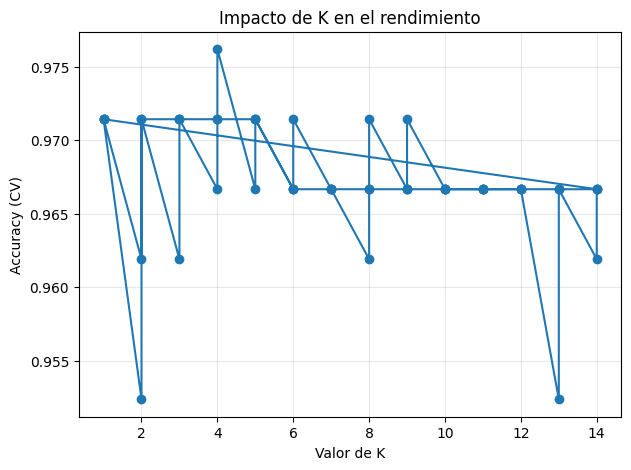

In [183]:
import numpy as np
import matplotlib.pyplot as plt

results = grid.cv_results_

mean_scores = results["mean_test_score"]
k_values = results["param_n_neighbors"].data

plt.figure(figsize=(7,5))
plt.plot(k_values, mean_scores, marker="o")
plt.xlabel("Valor de K")
plt.ylabel("Accuracy (CV)")
plt.title("Impacto de K en el rendimiento")
plt.grid(alpha=0.3)
plt.show()

1. El mejor rendimiento está en K=4
El pico máximo se alcanza alrededor de K=4 con ~0.977, siendo el valor de K más recomendable según estos datos.
2. Alta variabilidad en valores pequeños de K (K=1 a K=5)
Los valores bajos de K muestran oscilaciones muy pronunciadas, especialmente K=2 que cae hasta ~0.952. Esto indica sobreajuste (overfitting): el modelo es demasiado sensible al ruido local de los datos.
3. Estabilización a partir de K≈6
A medida que K crece, la curva se vuelve más estable y predecible, manteniéndose en torno a 0.967. Menos variabilidad implica un modelo más robusto, aunque ligeramente menos preciso que el pico en K=4.
4. Tendencia general decreciente
La línea de tendencia muestra una leve caída del accuracy conforme K aumenta, lo que sugiere un ligero subajuste (underfitting) con K muy grandes.
5. Anomalía en K=13
Hay una caída abrupta similar a la de K=2, lo que puede deberse a alguna particularidad en la distribución de los datos con ese número de vecinos.

Recomendación: Usar K=4 si se prioriza la máxima precisión, o un valor entre K=6 y K=12 si se prefiere mayor estabilidad y generalización.

**8) Graficar fronteras de decisión (2D)**

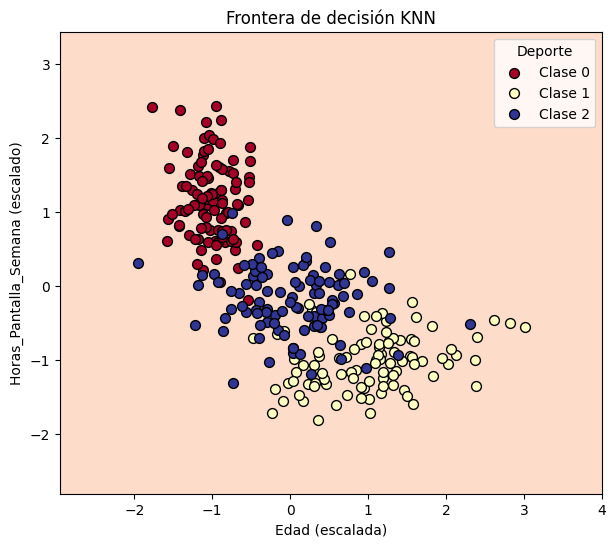

In [188]:
import numpy as np
import matplotlib.pyplot as plt

# Crear malla
x_min, x_max = X_scaled[:,0].min() - 1, X_scaled[:,0].max() + 1
y_min, y_max = X_scaled[:,1].min() - 1, X_scaled[:,1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

# Obtener el valor medio de la tercera característica de los datos de entrenamiento
# Esto se hace para visualizar un modelo 3D en 2D, manteniendo la tercera dimensión constante.
third_feature_mean = X_train.iloc[:, 2].mean()
third_feature_constant = np.full(xx.ravel().shape, third_feature_mean)

# Combinar las tres características para la predicción en la malla
X_mesh = np.c_[xx.ravel(), yy.ravel(), third_feature_constant]
# Convertir a DataFrame con nombres de características para evitar el UserWarning
X_mesh_df = pd.DataFrame(X_mesh, columns=X.columns)

# Realizar predicciones con el modelo sobre la malla (ahora con 3 características)
Z_raw = best_model.predict(X_mesh_df)
Z = Z_raw.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

# Obtener las etiquetas únicas de las clases y sus valores numéricos factorizados
unique_labels, y_factorized = np.unique(y, return_inverse=True)

# Asignar un color a cada clase para el scatter plot
cmap_scatter = plt.cm.RdYlBu
colors = cmap_scatter(np.linspace(0, 1, len(unique_labels)))

# Plotear los puntos de datos con una leyenda para cada clase
for i, label in enumerate(unique_labels):
    plt.scatter(
        X_scaled[y_factorized == i, 0],
        X_scaled[y_factorized == i, 1],
        c=[colors[i]], # Pasar el color como una lista para que funcione con el scatter
        label=f'Clase {label}', # Etiqueta para la leyenda
        edgecolor="k",
        s=50 # Tamaño de los puntos
    )

plt.xlabel("Edad (escalada)") # Etiqueta actualizada según las características del dataset
plt.ylabel("Horas_Pantalla_Semana (escalado)") # Etiqueta actualizada según las características del dataset
plt.title("Frontera de decisión KNN")
plt.legend(title="Deporte") # Añadir la leyenda
plt.show()

Interpretación por clase
* Clase 0 (Rojo) — Jóvenes, alta pantalla:
Concentrados en edad ≈ -1 a -2 y horas ≈ 1 a 2.5. Grupo muy compacto y bien definido, el más fácil de clasificar para el modelo.
* Clase 1 (Amarillo) — Mayores, baja pantalla:
Se ubican hacia la derecha (edad alta) y abajo (pocas horas). También relativamente bien separados, aunque con algo de mezcla con la Clase 2.
* Clase 2 (Azul) — Grupo intermedio:
Es el más disperso y problemático. Se solapa tanto con los rojos (arriba-izquierda) como con los amarillos (abajo-derecha). Este grupo es la principal fuente de errores del modelo.

Conclusión

El modelo distingue bien los extremos (Clase 0 vs Clase 1), pero la Clase 2 actúa como zona de transición y genera la mayoría de las clasificaciones incorrectas. Para mejorar esto se podría explorar agregar más features al modelo además de Edad y Horas de Pantalla.

**9) Guardar modelo con joblib**

In [ ]:
import joblib

joblib.dump(best_model, "modelo_knn_deportes.pkl")
joblib.dump(scaler, "scaler_deportes.pkl")

print("Modelo guardado correctamente.")

## Ejercicio 2: CLASIFICADOR DEPORTIVO K-NN

1. Importar librerías necesarias

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [193]:
df = pd.read_csv("deportes_knn.csv")

print(df.head())
print(df["deporte"].value_counts())

   altura_cm  peso_kg       deporte
0      185.4     71.0      Voleibol
1      179.8    101.9         Rugby
2      182.4     94.6      Voleibol
3      162.0    100.1  Halterofilia
4      204.5     86.6    Baloncesto
deporte
Natacion        38
Futbol          30
Gimnasia        30
Baloncesto      29
Voleibol        27
Halterofilia    26
Rugby           20
Name: count, dtype: int64


In [194]:
X = df[["altura_cm", "peso_kg"]]
y = df["deporte"]

2. Escale las variables usando StandardScaler.

In [195]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. Divide los datos en entrenamiento y test (70/30).

In [196]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

4. Entrene un modelo K-NN (K=3) y evalue con matriz de confusión y accuracy.

In [197]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [198]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6166666666666667

Matriz de confusión:
 [[9 0 0 0 0 0 0]
 [0 4 0 0 4 0 1]
 [0 0 9 0 0 0 0]
 [0 2 0 4 1 1 0]
 [0 2 0 0 7 0 2]
 [3 0 0 0 0 2 1]
 [4 0 0 0 2 0 2]]

Classification report:
               precision    recall  f1-score   support

  Baloncesto       0.56      1.00      0.72         9
      Futbol       0.50      0.44      0.47         9
    Gimnasia       1.00      1.00      1.00         9
Halterofilia       1.00      0.50      0.67         8
    Natacion       0.50      0.64      0.56        11
       Rugby       0.67      0.33      0.44         6
    Voleibol       0.33      0.25      0.29         8

    accuracy                           0.62        60
   macro avg       0.65      0.59      0.59        60
weighted avg       0.65      0.62      0.60        60



5. Visualice las fronteras de decisión en un gráfico 2D.

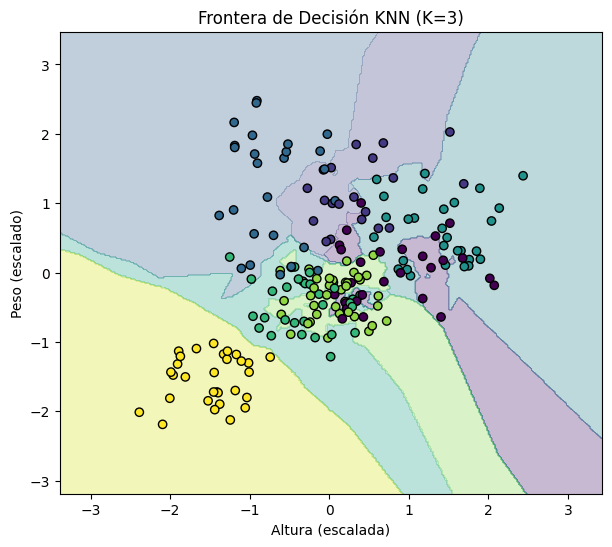

In [199]:
# Crear malla
x_min, x_max = X_scaled[:,0].min()-1, X_scaled[:,0].max()+1
y_min, y_max = X_scaled[:,1].min()-1, X_scaled[:,1].max()+1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z_raw = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Get the numerical mapping from the target variable y to ensure consistency
factorized_y, unique_labels = pd.factorize(y)
label_to_int = {label: i for i, label in enumerate(unique_labels)}

# Convert the predicted string labels to their integer representation
Z = np.array([label_to_int[label] for label in Z_raw])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, alpha=0.3)

plt.scatter(
    X_scaled[:,0],
    X_scaled[:,1],
    c=factorized_y, # Use the same factorized values for consistency
    edgecolor="k"
)

plt.xlabel("Altura (escalada)")
plt.ylabel("Peso (escalado)")
plt.title("Frontera de Decisión KNN (K=3)")
plt.show()

6. Probar valores de K entre 1 y 10, evaluando con validación cruzada.

In [200]:
k_values = range(1, 11)
scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(model, X_scaled, y, cv=5).mean()
    scores.append(cv_score)

best_k = k_values[np.argmax(scores)]

print("Mejor K:", best_k)
print("Mejor score CV:", max(scores))

Mejor K: 6
Mejor score CV: 0.625


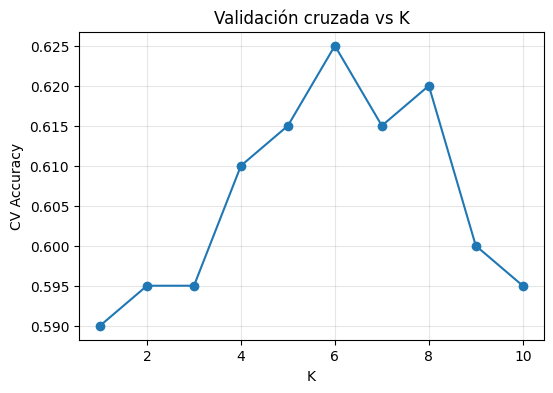

In [201]:
plt.figure(figsize=(6,4))
plt.plot(k_values, scores, marker="o")
plt.xlabel("K")
plt.ylabel("CV Accuracy")
plt.title("Validación cruzada vs K")
plt.grid(alpha=0.3)
plt.show()

7. Exporte el modelo entrenado como .pkl.

In [202]:
modelo_final = KNeighborsClassifier(n_neighbors=best_k)
modelo_final.fit(X_scaled, y)

joblib.dump(modelo_final, "modelo_knn_deportes.pkl")
joblib.dump(scaler, "scaler_deportes.pkl")

print("Modelo guardado correctamente.")

Modelo guardado correctamente.
